# Train-Validation

In [319]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from paretoset import paretoset
import numpy as np
from copy import deepcopy

In [320]:
percentages = [2.5, 5, 25, 50, 75, 100, 200]
datasets_names = {
    'kuhar': 'KH',
    'motionsense': 'MS',
    'realworld_thigh': 'RW-T',
    'realworld_waist': 'RW-W',
    'uci': 'UCI',
    'wisdm': 'WISDM',
}
reducer_names = {
    'ae': 'AE',
    'tae': 'TAE',
    'convae': 'ConvAE',
    'convtae': 'ConvTAE',
    'pca': 'PCA',
    'umap': 'UMAP'
}

In [321]:
TV_nor_df = pd.read_csv('TV_no_reducer_scores.csv')
nor_reordered = TV_nor_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T

In [322]:
df = pd.read_csv('../experiments/P10_ae_kuhar_p5_mc/data.csv')
df = df[df['score'] > 0.5]
mask = paretoset(df[['config/latent_dim', 'score']], sense=['min', 'max'])
pareto_df = df[mask]
pareto_df = pareto_df.sort_values(by='config/latent_dim')

In [323]:
kh_mask = df['config/MC-red_dataset-0'] == 1
ms_mask = df['config/MC-red_dataset-1'] == 1
uci_mask = df['config/MC-red_dataset-2'] == 1
wisdm_mask = df['config/MC-red_dataset-3'] == 1
rw_t_mask = df['config/MC-red_dataset-4'] == 1
rw_w_mask = df['config/MC-red_dataset-5'] == 1

kh_df = df[df['config/MC-red_dataset-0'] == 1]
ms_df = df[df['config/MC-red_dataset-1'] == 1]
uci_df = df[df['config/MC-red_dataset-2'] == 1]
wisdm_df = df[df['config/MC-red_dataset-3'] == 1]
rw_t_df = df[df['config/MC-red_dataset-4'] == 1]
rw_w_df = df[df['config/MC-red_dataset-5'] == 1]

In [324]:
# Only kuhar
# reducer_df = df[kh_mask]
# Only motionsense
# reducer_df = df[ms_mask]
reducer_df = df[ms_mask]
# reducer_df = df[kh_mask & ms_mask & uci_mask & ~wisdm_mask & rw_t_mask & rw_w_mask]

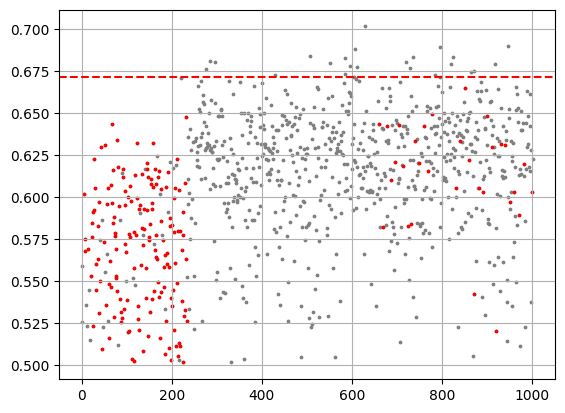

In [325]:
plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,'kuhar'], color='red', linestyle='--')
plt.scatter(df['Unnamed: 0'], df['score'], marker='o', color='gray', s=3)
plt.scatter(reducer_df['Unnamed: 0'], reducer_df['score'], marker='x', color='red', s=3)
plt.grid()
plt.show()

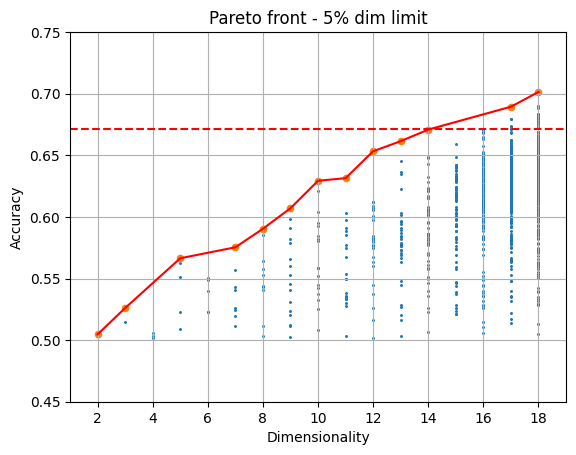

In [326]:
plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,'kuhar'], color='red', linestyle='--')
plt.plot(pareto_df['config/latent_dim'], pareto_df['score'], label='model', color='red')
plt.title('Pareto front - 5% dim limit')
plt.scatter(df['config/latent_dim'],df['score'], label='model', s=5, marker='.')
plt.scatter(pareto_df['config/latent_dim'], pareto_df['score'], label='model', s=20)
# plt.scatter(reducer_df['config/latent_dim'], reducer_df['score'], s=10, marker='x')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy') # on kh, ms, ...
plt.xlim(1, 19)
plt.ylim(0.45, 0.75)
plt.grid()
# plt.savefig('pareto_50.png')
plt.show()

In [327]:
df = pd.read_csv('../experiments/P10_ae_kuhar_p5_mc2/data.csv')
df = df[df['score'] > 0.5]
mask = paretoset(df[['config/latent_dim', 'score']], sense=['min', 'max'])
pareto_df = df[mask]
pareto_df = pareto_df.sort_values(by='config/latent_dim')

In [328]:
kh_mask = df['config/MC-red_dataset-kuhar.standartized_balanced[train]'] == 1
ms_mask = df['config/MC-red_dataset-motionsense.standartized_balanced[train]'] == 1
uci_mask = df['config/MC-red_dataset-uci.standartized_balanced[train]'] == 1
wisdm_mask = df['config/MC-red_dataset-wisdm.standartized_balanced[train]'] == 1
rw_t_mask = df['config/MC-red_dataset-realworld_thigh.standartized_balanced[train]'] == 1
rw_w_mask = df['config/MC-red_dataset-realworld_waist.standartized_balanced[train]'] == 1

In [329]:
# Only motionsense
reducer_df = df[ms_mask]
# reducer_df = df[kh_mask & ms_mask & uci_mask & wisdm_mask & rw_t_mask & rw_w_mask]

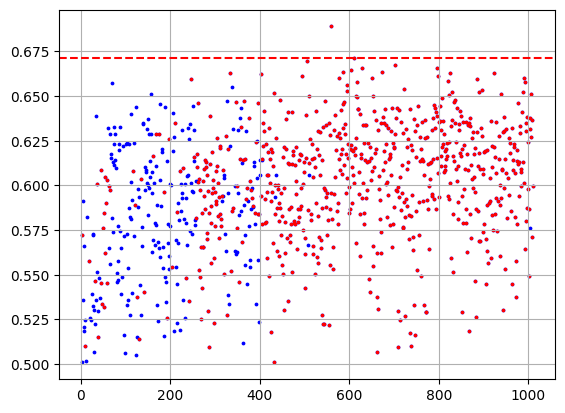

In [330]:
plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,'kuhar'], color='red', linestyle='--')
plt.scatter(df['Unnamed: 0'], df['score'], marker='o', color='b', s=3)
plt.scatter(reducer_df['Unnamed: 0'], reducer_df['score'], marker='x', color='r', s=3)
plt.grid()
plt.show()

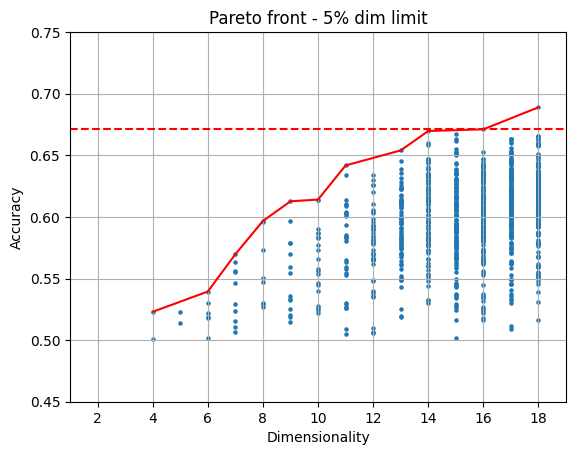

In [331]:
plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,'kuhar'], color='red', linestyle='--')
plt.plot(pareto_df['config/latent_dim'], pareto_df['score'], label='model', color='red')
plt.title('Pareto front - 5% dim limit')
plt.scatter(df['config/latent_dim'],df['score'], label='model', s=5)
# plt.scatter(reducer_df['config/latent_dim'], reducer_df['score'], s=5, marker='x')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.xlim(1, 19)
plt.ylim(0.45, 0.75)
plt.grid()
# plt.savefig('pareto_50.png')
plt.show()